In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

In [4]:
df = pd.read_csv('D:\PROJECT\POWER SUPPLY\household_power_consumption.txt',delimiter=';')

C:\Users\saran\AppData\Local\Temp\ipykernel_34024\2803678272.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:\PROJECT\POWER SUPPLY\household_power_consumption.txt',delimiter=';')


In [5]:
df.describe

<bound method NDFrame.describe of                Date      Time Global_active_power Global_reactive_power  \
0        16/12/2006  17:24:00               4.216                 0.418   
1        16/12/2006  17:25:00               5.360                 0.436   
2        16/12/2006  17:26:00               5.374                 0.498   
3        16/12/2006  17:27:00               5.388                 0.502   
4        16/12/2006  17:28:00               3.666                 0.528   
...             ...       ...                 ...                   ...   
2075254  26/11/2010  20:58:00               0.946                   0.0   
2075255  26/11/2010  20:59:00               0.944                   0.0   
2075256  26/11/2010  21:00:00               0.938                   0.0   
2075257  26/11/2010  21:01:00               0.934                   0.0   
2075258  26/11/2010  21:02:00               0.932                   0.0   

         Voltage Global_intensity Sub_metering_1 Sub_metering_2  

In [6]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df.loc[df['Sub_metering_3'].isnull()]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [10]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [11]:
for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

In [12]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

C:\Users\saran\AppData\Local\Temp\ipykernel_34024\3105016366.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])


In [13]:
df.set_index("Datetime", inplace=True)

In [14]:

df["hour"] = df.index.hour
df["day"] = df.index.day
df["month"] = df.index.month
df["weekday"] = df.index.weekday
df["is_weekend"] = df["weekday"].apply(lambda x: 1 if x >= 5 else 0)
df["is_peak"] = df["hour"].apply(lambda x: 1 if x in [18, 19, 20, 21] else 0)


In [15]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day,month,weekday,is_weekend,is_peak
Datetime,,,,,,,,,,,,,,,
2006-12-16 17:24:00,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,17,16,12,5,1,0
2006-12-16 17:25:00,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,17,16,12,5,1,0
2006-12-16 17:26:00,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,17,16,12,5,1,0
2006-12-16 17:27:00,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,17,16,12,5,1,0
2006-12-16 17:28:00,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,17,16,12,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,26,11,4,0,1
2010-11-26 20:59:00,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,26,11,4,0,1
2010-11-26 21:00:00,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,26,11,4,0,1


In [16]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
hour                     0
day                      0
month                    0
weekday                  0
is_weekend               0
is_peak                  0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
hour                     0
day                      0
month                    0
weekday                  0
is_weekend               0
is_peak                  0
dtype: int64

In [19]:
df.drop(['Date','Time'],axis=1,inplace=True)

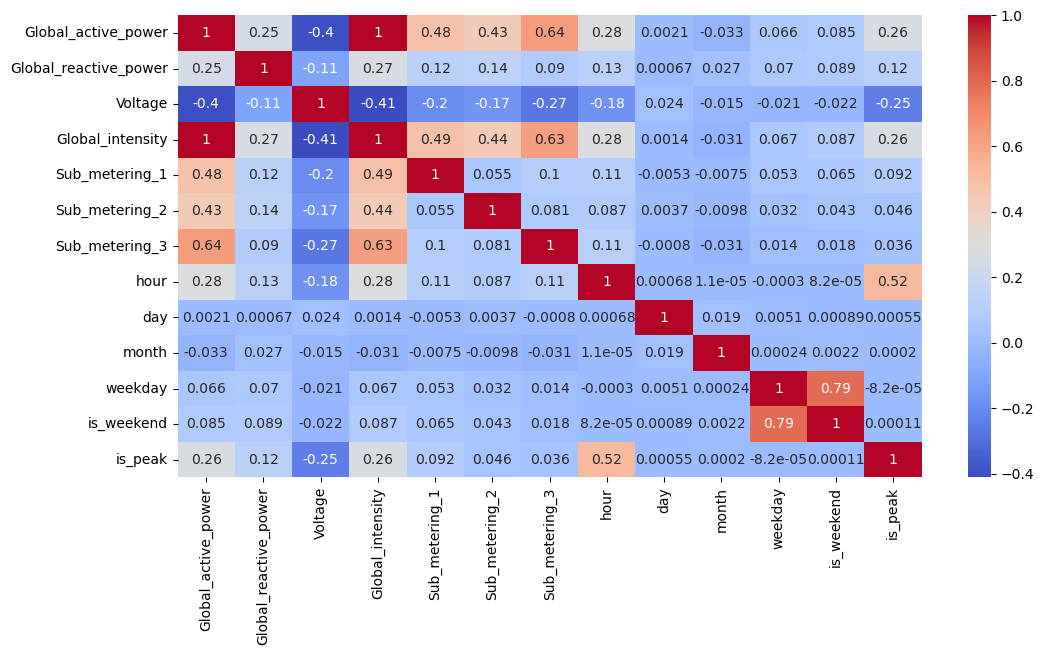

In [20]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [21]:
df.drop(['Global_intensity'],axis=1,inplace=True)

In [22]:
X = df.drop(["Global_active_power"], axis=1)
y = df["Global_active_power"]

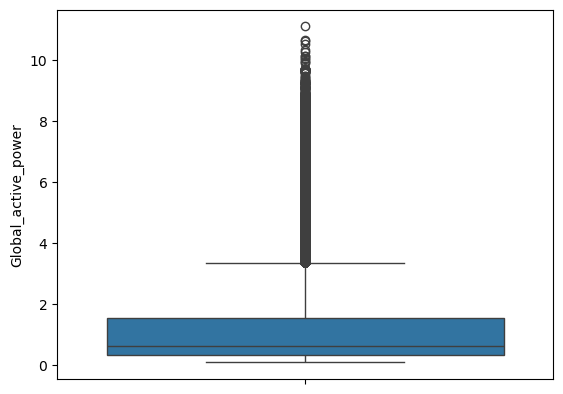

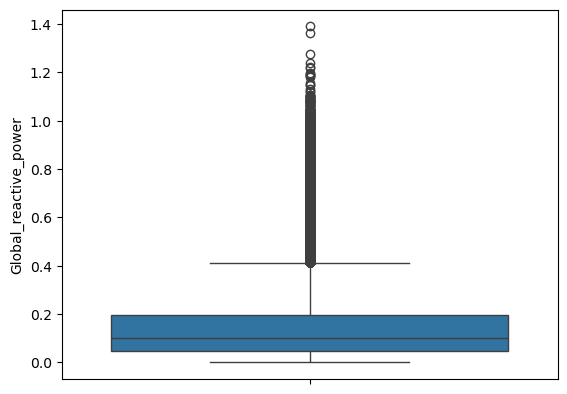

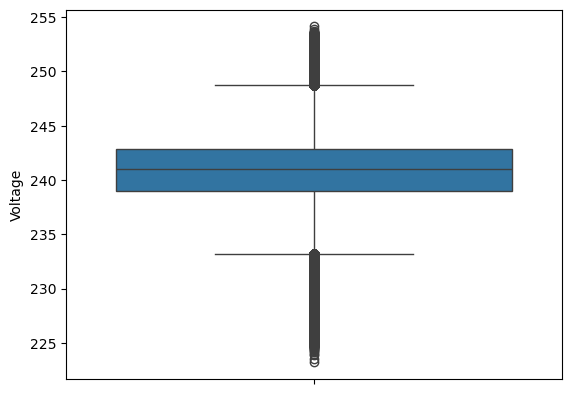

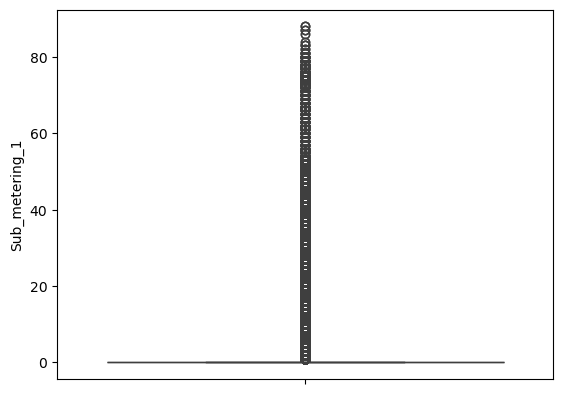

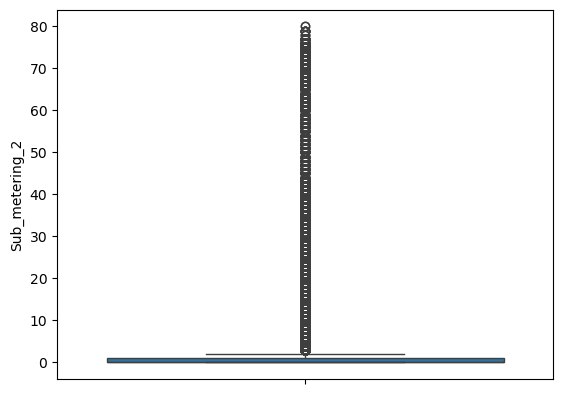

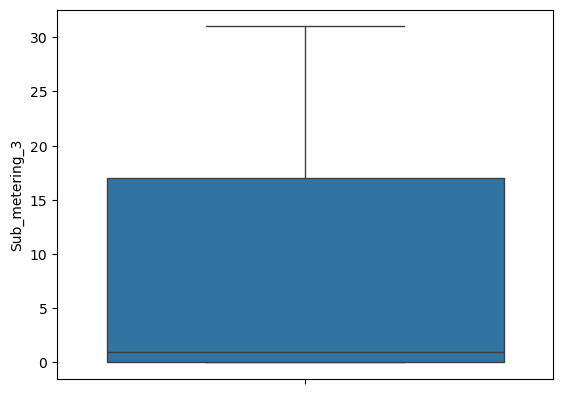

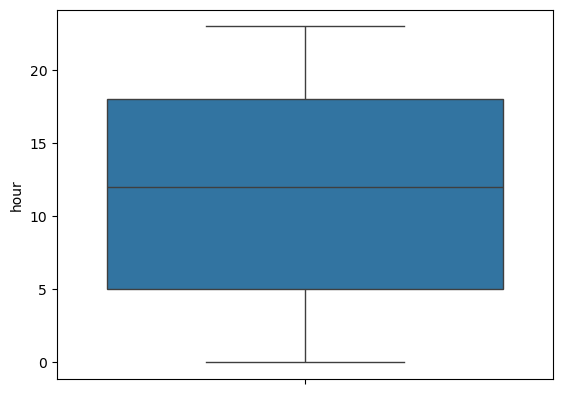

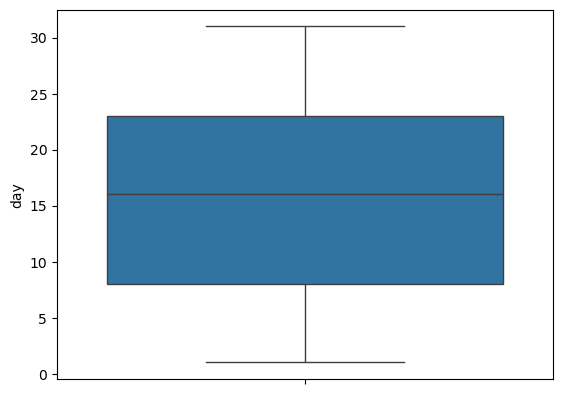

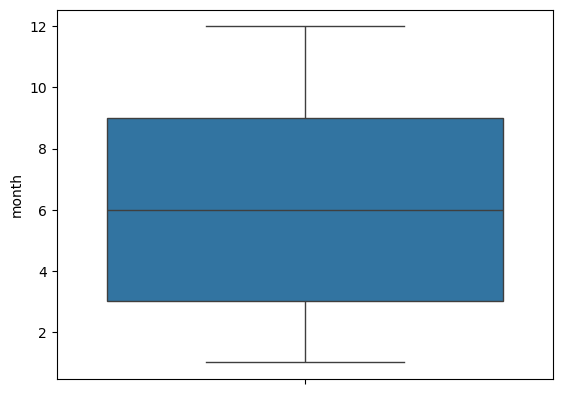

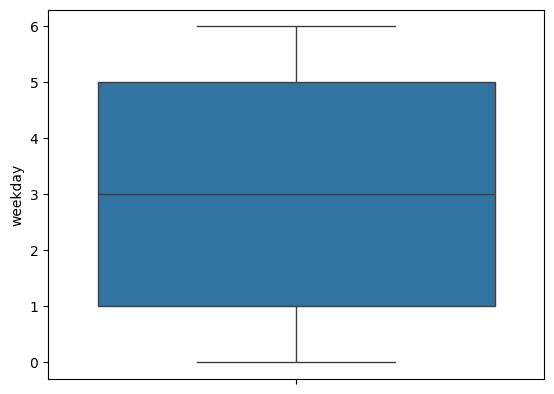

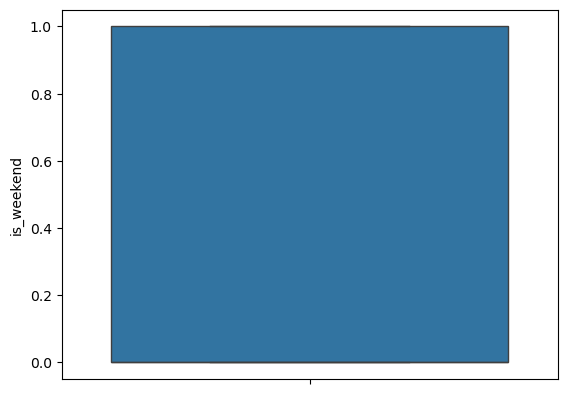

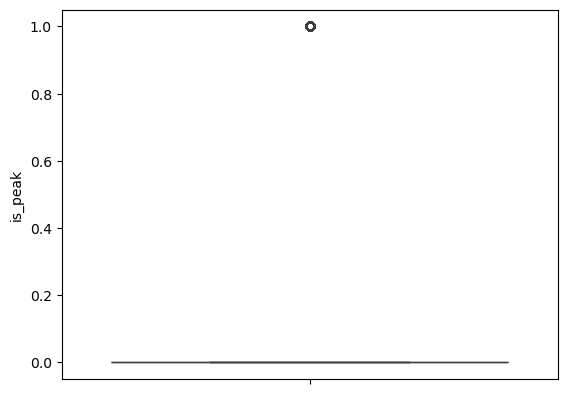

In [23]:
for n in df.columns:
    sns.boxplot(df[n])
    plt.show()

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[ 2.61072061, -1.85181608, -0.18233673, ...,  1.00655385,
         1.59381575, -0.44759562],
       [ 2.77040557, -2.2252745 , -0.18233673, ...,  1.00655385,
         1.59381575, -0.44759562],
       [ 3.32043153, -2.33021323, -0.18233673, ...,  1.00655385,
         1.59381575, -0.44759562],
       ...,
       [-1.09751893, -0.31477235, -0.18233673, ...,  0.50596117,
        -0.6274251 ,  2.2341595 ],
       [-1.09751893, -0.35180955, -0.18233673, ...,  0.50596117,
        -0.6274251 ,  2.2341595 ],
       [-1.09751893, -0.39810605, -0.18233673, ...,  0.50596117,
        -0.6274251 ,  2.2341595 ]])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100)
}

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),        


     
}

In [30]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    results.append([name, rmse, mae, r2])

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R2 Score"])
print(results_df)

               Model      RMSE       MAE  R2 Score
0  Linear Regression  0.507399  0.332558  0.770937
